 #  <p style="text-align: center;">Technical Support Data Analysis

Technical support data can often be a rich source of information on opportunities for improving customer experience. The lesser the trouble customers have with the product the better. Even better when the customers are able to overcome
technical challenge quickly with minimal effort. Let us analyze the tech support data and do some basic analysis on problem types, time to resolve the problem and channel of suppor that is most suitable

## Loading the Dataset

In [51]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [52]:
import matplotlib.pylab as plt
%matplotlib inline

In [53]:
tech_supp_df = pd.read_csv("technical_support_data.csv")

In [54]:
tech_supp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 8 columns):
PROBLEM_TYPE             23 non-null object
no_of_cases              23 non-null int64
Avg_pending_calls        23 non-null float64
Avg_resol_time           23 non-null int64
recurrence_freq          23 non-null float64
Replace_percent          23 non-null float64
In_warranty_percent      23 non-null int64
Post_warranty_percent    23 non-null int64
dtypes: float64(3), int64(4), object(1)
memory usage: 1.5+ KB


The dataset contains one record for each unique problem type. It has metrics for each type like count, average calls to resolve, average resolution time etc.

In [55]:
tech_supp_df.head().T

,0,1,2,3,4
PROBLEM_TYPE,Temperature control not working,power chord does not tightly fit,Fan swing not working,Main switch does not on,Forgot mobile app password
no_of_cases,170,12,5,3,45
Avg_pending_calls,1.3,2,1,2,2.3
Avg_resol_time,32,150,35,8,54
recurrence_freq,0.04,0.01,0.02,0.01,0.15
Replace_percent,0,0.5,0.2,0.7,0
In_warranty_percent,75,5,90,5,99
Post_warranty_percent,25,95,10,95,1


In [56]:
from scipy.stats import zscore

In [57]:
numeric_cols = tech_supp_df.drop('PROBLEM_TYPE', axis=1)

In [58]:
Prob_type  = tech_supp_df.pop("PROBLEM_TYPE")

In [59]:
numeric_cols = numeric_cols.apply(zscore)

In [60]:
tech_supp_df = numeric_cols.join(Prob_type)

In [61]:
tech_supp_df.head().T

,0,1,2,3,4
no_of_cases,0.179429,-0.862176,-0.908323,-0.921508,-0.644625
Avg_pending_calls,-0.701207,0.0271435,-1.01336,0.0271435,0.339294
Avg_resol_time,-0.538351,1.51086,-0.486253,-0.95514,-0.156296
recurrence_freq,-0.843188,-1.10177,-1.01557,-1.10177,0.10493
Replace_percent,-0.561463,2.24585,0.561463,3.36878,-0.561463
In_warranty_percent,0.138067,-1.7782,0.548696,-1.7782,0.795074
Post_warranty_percent,-0.138067,1.7782,-0.548696,1.7782,-0.795074
PROBLEM_TYPE,Temperature control not working,power chord does not tightly fit,Fan swing not working,Main switch does not on,Forgot mobile app password


## Group Data into similar clusters

Now, we will use K-Means clustering to group data based on their attribute. First, we need to determine the optimal number of groups. For that we conduct the knee test to see where the knee happens.

In [62]:
tech_supp_attributes = tech_supp_df.drop("PROBLEM_TYPE",axis=1)

In [63]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

Sample calculation for two clusters

In [64]:
k = 2

In [65]:
model=KMeans(n_clusters=k)

In [66]:
# Calculate centrode C0 and C1 of clusters
model.fit(tech_supp_attributes)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [67]:
# Give labels 
prediction=model.predict(tech_supp_attributes)

In [68]:
prediction

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0])

In [69]:
model.cluster_centers_

array([[ 0.31086554, -0.53862856, -0.5285829 ,  0.04567266,  0.19300307,
        -0.34955565,  0.34955565],
       [-0.7105498 ,  1.23115099,  1.20818948, -0.10439466, -0.44114987,
         0.79898435, -0.79898435]])

In [70]:
# calculate distance of 23 data point between and C0 and C1
cdist(tech_supp_attributes, model.cluster_centers_, 'euclidean')

array([[1.37063712, 3.00173086],
       [3.93297837, 4.80237067],
       [2.14226418, 3.14782968],
       [4.18390245, 5.91339532],
       [2.239507  , 1.64921128],
       [3.42258151, 1.50663569],
       [4.11421511, 1.33703788],
       [1.93936615, 2.94153696],
       [1.45407592, 4.0422121 ],
       [3.31941834, 0.30180372],
       [4.11077246, 1.42439209],
       [2.27080843, 4.66501095],
       [2.08295294, 2.98632206],
       [3.71669637, 1.17607233],
       [2.74073447, 4.28554457],
       [3.14090515, 4.66906717],
       [2.82479686, 5.47402416],
       [1.06638915, 3.0218959 ],
       [2.89738482, 1.31073158],
       [1.82612807, 3.55879936],
       [2.29329738, 3.45050927],
       [2.07409042, 3.14770762],
       [2.20539395, 4.09589037]])

In [71]:
# Calculate min distance 
np.min(cdist(tech_supp_attributes, model.cluster_centers_, 'euclidean'), axis=1)

array([1.37063712, 3.93297837, 2.14226418, 4.18390245, 1.64921128,
       1.50663569, 1.33703788, 1.93936615, 1.45407592, 0.30180372,
       1.42439209, 2.27080843, 2.08295294, 1.17607233, 2.74073447,
       3.14090515, 2.82479686, 1.06638915, 1.31073158, 1.82612807,
       2.29329738, 2.07409042, 2.20539395])

In [72]:
# Sum of all above distances 
distortions = sum(np.min(cdist(tech_supp_attributes, model.cluster_centers_, 'euclidean'), axis=1))

In [73]:
distortions

46.254605582818904

In [74]:
distortions / tech_supp_attributes.shape[0]

2.011069807948648

Now calculate distortions for 1 to 10 clusters

In [75]:
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(tech_supp_attributes)
    prediction=model.predict(tech_supp_attributes)
    distortions = sum(np.min(cdist(tech_supp_attributes, model.cluster_centers_, 'euclidean'), axis=1))
    meanDistortions.append( distortions / tech_supp_attributes.shape[0])

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

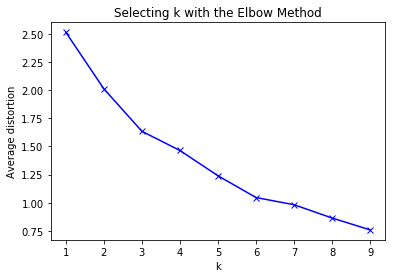

In [76]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

Though the bend is not coming out clearly as there are many bends, let us look at 2 clusters and 3 clusters

In [77]:
# Let us first start with K = 2
final_model=KMeans(2)
final_model.fit(tech_supp_attributes)
prediction=final_model.predict(tech_supp_attributes)

In [78]:
#Append the prediction 
tech_supp_df["GROUP"] = prediction
print("Groups Assigned : \n")
tech_supp_df[["PROBLEM_TYPE", "GROUP"]]

Groups Assigned : 



,PROBLEM_TYPE,GROUP
0,Temperature control not working,0
1,power chord does not tightly fit,0
2,Fan swing not working,0
3,Main switch does not on,0
4,Forgot mobile app password,1
5,AC stops abruptly,1
6,App hangs while entring commands,1
7,App takes a long time to initialize,0
8,Unable to connect the App to the device,0
9,Reinstalling the app hangs the phone,1


Analyze the distribution of the data among the two groups (K = 2). One of the most informative visual tool is boxplot.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E36C1270F0>,
      dtype=object)

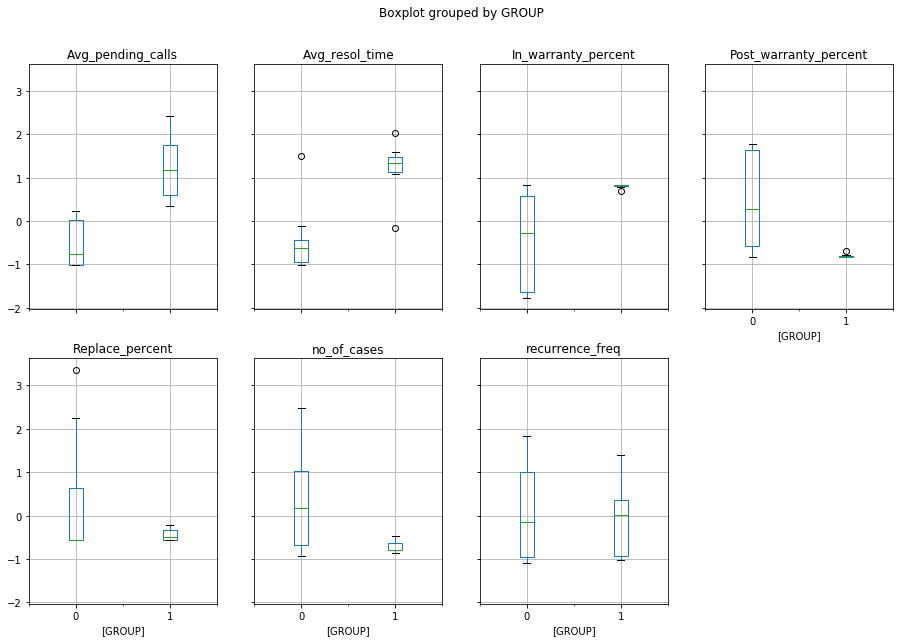

In [79]:
tech_supp_df.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))

In [ ]:
# with k=2 we are able to put 23 problems in 2 clusters/bucket and able to explain the analysis
# the Replace_percent has long tail means the within cluster varience is more and need one more cluster
# Unable to distinguwish groups in last graph for reference_freq

In [33]:
# The K = 2 boxplot clearly shows outliers in group 1. Indicating that the group 1 is stretched
# indicating probability of another cluster. Let us try with K = 3, the next elbow point

In [80]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(tech_supp_attributes)
prediction=final_model.predict(tech_supp_attributes)

In [81]:
#Append the prediction 
tech_supp_df["GROUP"] = prediction
print("Groups Assigned : \n")
tech_supp_df[["PROBLEM_TYPE", "GROUP"]]

Groups Assigned : 



,PROBLEM_TYPE,GROUP
0,Temperature control not working,0
1,power chord does not tightly fit,1
2,Fan swing not working,0
3,Main switch does not on,1
4,Forgot mobile app password,2
5,AC stops abruptly,2
6,App hangs while entring commands,2
7,App takes a long time to initialize,0
8,Unable to connect the App to the device,0
9,Reinstalling the app hangs the phone,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E36CBCA9E8>,
      dtype=object)

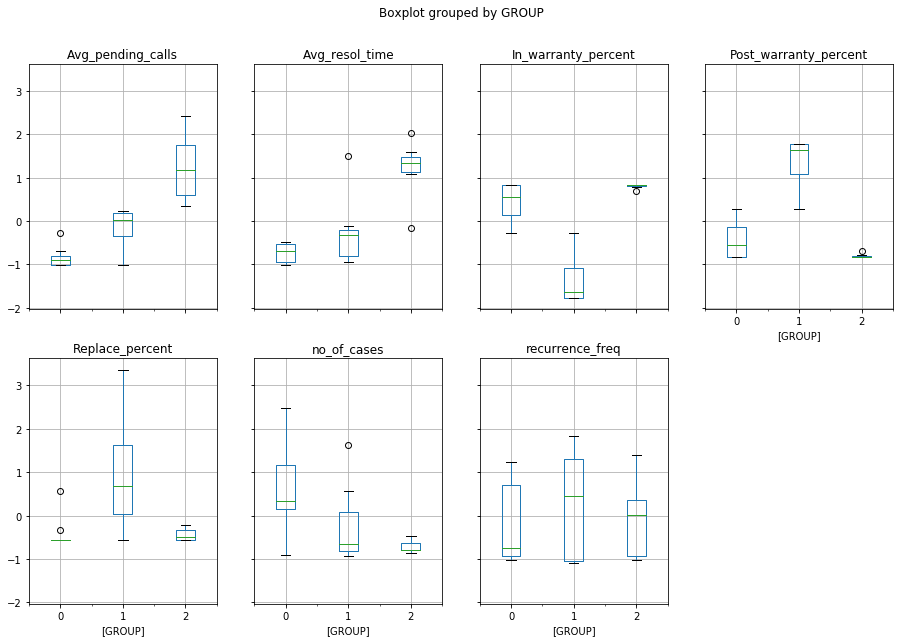

In [82]:
tech_supp_df.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))

In [37]:
# Number of cases in Group 0 is high but resolution time is very low and pending calls too is low.... (teething problem)
# Number of cases in group 1 is second highest, pending calls is also second highest, resolution time is slightly higher
# Replacement_percent is very high.... (Design problem)

# What does this indicate?

In [ ]:
# 